# Extracting a point from the Catalan Data Cube

This notebook illustrates how to extract a point from our datacube.

* import the datacube library

In [2]:
import datacube
import xarray as xr
import pandas as pd

- import matplotlib library

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

- import write_cog 

In [4]:
#from utils.cog import write_cog

- import rasterio and rioxarray

In [5]:
import rasterio

In [6]:
#import rasterio as rio
import rioxarray
#import os
#data_path = os.getcwd()

* Request a datacube object

In [7]:
dc = datacube.Datacube(app='jupyter-app')

* Getting the names of the products in the datacube

In [8]:
p=dc.list_products()
print(type(p))
print(p.to_string())

<class 'pandas.core.frame.DataFrame'>
                   name                                        description instrument label   lat  time   lon     platform creation_time product_type    format         crs resolution             tile_size spatial_dimensions
id                                                                                                                                                                                                                             
3    s2_level2a_granule  Sentinel-2 Level 2 - Sen2Cor Bottom of Atmosph...        MSI  None  None  None  None   Sentinel-2          None      S2MSI2A  JPEG2000         NaN        NaN                   NaN                NaN
4   s2_level2a_utm31_10  Sentinel-2 A&B MSI L2A 10 metre, 100km tile, U...        MSI  None  None  None  None   Sentinel-2          None      S2MSI2A    NetCDF  EPSG:32631  [-10, 10]  [100000.0, 100000.0]             (y, x)
1   s2a_level1c_granule  Sentinel-2A Level1C - Ortho Rectified Top

In [9]:
p=dc.list_products(with_pandas=False)
p[1]

{'id': 4,
 'name': 's2_level2a_utm31_10',
 'description': 'Sentinel-2 A&B MSI L2A 10 metre, 100km tile, Universal Transversal Mercator 31 projection (EPSG:32631)',
 'creation_time': None,
 'format': 'NetCDF',
 'label': None,
 'lat': None,
 'lon': None,
 'time': None,
 'platform': 'Sentinel-2',
 'instrument': 'MSI',
 'product_type': 'S2MSI2A',
 'crs': 'EPSG:32631',
 'spatial_dimensions': ('y', 'x'),
 'tile_size': [100000.0, 100000.0],
 'resolution': [-10, 10]}

* Load some data

In this case we ask for the Sentinel 2 product of a single point in space (2, 42).
This could take a some seconds. Please be patient.

In [10]:
"""ds = dc.load(product="s2_level2a_utm31_10",
             x=(2, 2),
             y=(42, 42),
             time=("2020-01-01", "2020-12-31"))
"""

'ds = dc.load(product="s2_level2a_utm31_10",\n             x=(2, 2),\n             y=(42, 42),\n             time=("2020-01-01", "2020-12-31"))\n'

In this case we ask for the Sentinel 2 product of small area.

In [11]:
"""ds = dc.load(product="s2_level2a_utm31_10",
             x=(2.15, 2.2),
             y=(42.15, 42.2),
             time=("2020-01-01", "2020-01-16"))   #time=("2020-01-01", "2020-12-31"))
"""  

'ds = dc.load(product="s2_level2a_utm31_10",\n             x=(2.15, 2.2),\n             y=(42.15, 42.2),\n             time=("2020-01-01", "2020-01-16"))   #time=("2020-01-01", "2020-12-31"))\n'

In [66]:
ds = dc.load(product="s2_level2a_utm31_10",
             x=(429770,433953),
             y=(4666780,4672292), 
             crs='EPSG:32631',
             time=("2020-01-01", "2020-01-16"))  #2020-01-16

### * Showing the results of the query in the screan.

In [67]:
ds

<xarray.Dataset>
Dimensions:        (time: 6, x: 419, y: 552)
Coordinates:
  * time           (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
  * y              (y) float64 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x              (x) float64 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Data variables:
    blue           (time, y, x) int16 20 3 1 1 12 1 ... 847 893 629 338 261 271
    green          (time, y, x) int16 79 66 57 53 30 43 ... 1112 762 432 324 313
    red            (time, y, x) int16 85 51 30 64 4 15 ... 1318 877 501 421 420
    nir            (time, y, x) int16 488 380 357 287 ... 1768 1306 1300 1298
    veg1           (time, y, x) int16 186 104 104 77 77 ... 1470 947 947 665 665
    veg2           (time, y, x) int16 433 370 370 273 273 ... 1323 1323 982 982
    veg3           (time, y, x) int16 443 358 358 314 ... 1411 1411 1218 1218
    snowicecloud   (time, y, x) int16 369 310 310 296 ... 2035 2035 1719 1719
    snowicecloud2  (time,

In [14]:
ds.data_vars  #a dictionary of data variables

Data variables:
    blue           (time, y, x) int16 218 156 125 67 47 ... 893 629 338 261 271
    green          (time, y, x) int16 343 249 185 53 5 ... 1112 762 432 324 313
    red            (time, y, x) int16 370 235 180 65 27 ... 1318 877 501 421 420
    nir            (time, y, x) int16 1528 1212 998 619 ... 1768 1306 1300 1298
    veg1           (time, y, x) int16 499 298 298 117 117 ... 947 947 665 665
    veg2           (time, y, x) int16 973 640 640 323 323 ... 1323 1323 982 982
    veg3           (time, y, x) int16 1165 733 733 348 ... 1411 1411 1218 1218
    snowicecloud   (time, y, x) int16 1168 840 840 476 ... 2035 2035 1719 1719
    snowicecloud2  (time, y, x) int16 702 435 435 251 ... 1467 1467 1151 1151
    veg4           (time, y, x) int16 1269 828 828 453 ... 1622 1622 1422 1422
    scl            (time, y, x) int16 4 2 2 2 2 2 2 2 2 2 ... 5 5 5 5 5 5 5 5 5
    aerosol        (time, y, x) int16 21 5 5 5 5 5 5 ... 256 256 224 224 224 224
    water_vapour   (time, y, 

In [68]:
ds.data_vars['nir']

<xarray.DataArray 'nir' (time: 6, y: 552, x: 419)>
array([[[ 488,  380, ..., 1594, 1754],
        [ 312,  302, ..., 1440, 1580],
        ...,
        [2938, 2732, ..., 1015,  974],
        [2568, 2170, ..., 1194, 1196]],

       [[1528, 1212, ..., 1542, 1500],
        [ 655,  518, ..., 1478, 1714],
        ...,
        [3262, 3052, ..., 1620, 1470],
        [3188, 2990, ..., 1222, 1204]],

       ...,

       [[2850, 2776, ..., 2844, 2814],
        [2626, 2552, ..., 2800, 2978],
        ...,
        [3698, 3630, ..., 2134, 2060],
        [3608, 3598, ..., 1942, 1960]],

       [[1572, 1338, ..., 1610, 1624],
        [ 861,  568, ..., 1502, 1786],
        ...,
        [3254, 3104, ..., 1666, 1542],
        [3140, 3044, ..., 1300, 1298]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05

In [69]:
ds['red']

<xarray.DataArray 'red' (time: 6, y: 552, x: 419)>
array([[[  85,   51, ...,  634,  692],
        [  11,   22, ...,  554,  599],
        ...,
        [ 544,  564, ...,  339,  320],
        [ 536,  475, ...,  372,  430]],

       [[ 370,  235, ...,  558,  585],
        [ 114,   54, ...,  550,  730],
        ...,
        [ 719,  755, ...,  479,  438],
        [ 651,  684, ...,  378,  413]],

       ...,

       [[1950, 1918, ..., 1690, 1738],
        [1886, 1802, ..., 1708, 1794],
        ...,
        [2170, 2144, ..., 1252, 1252],
        [2114, 2138, ..., 1228, 1240]],

       [[ 394,  288, ...,  586,  643],
        [ 135,  105, ...,  607,  703],
        ...,
        [ 788,  807, ...,  499,  487],
        [ 727,  742, ...,  421,  420]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05

In [70]:
ds['scl'].values

array([[[2, 2, 2, ..., 4, 5, 5],
        [2, 2, 2, ..., 4, 5, 5],
        [2, 2, 2, ..., 4, 4, 4],
        ...,
        [4, 4, 4, ..., 5, 4, 4],
        [4, 4, 4, ..., 5, 7, 7],
        [4, 4, 4, ..., 5, 7, 7]],

       [[4, 2, 2, ..., 4, 5, 5],
        [4, 2, 2, ..., 4, 5, 5],
        [2, 2, 2, ..., 4, 5, 5],
        ...,
        [4, 4, 4, ..., 5, 5, 5],
        [4, 4, 4, ..., 5, 5, 5],
        [4, 4, 4, ..., 5, 5, 5]],

       [[2, 2, 2, ..., 7, 5, 5],
        [2, 2, 2, ..., 7, 5, 5],
        [2, 2, 2, ..., 5, 5, 5],
        ...,
        [4, 4, 4, ..., 5, 5, 5],
        [4, 4, 4, ..., 5, 5, 5],
        [4, 4, 4, ..., 5, 5, 5]],

       [[2, 3, 3, ..., 4, 5, 5],
        [2, 3, 3, ..., 4, 5, 5],
        [3, 3, 3, ..., 4, 5, 5],
        ...,
        [4, 4, 4, ..., 5, 5, 5],
        [4, 4, 4, ..., 5, 7, 7],
        [4, 4, 4, ..., 5, 7, 7]],

       [[8, 8, 8, ..., 8, 8, 8],
        [8, 8, 8, ..., 8, 8, 8],
        [8, 8, 8, ..., 8, 8, 8],
        ...,
        [8, 8, 8, ..., 8, 8, 8],
   

In [71]:
ds.coords

Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

In [72]:
ds.dims

Frozen(SortedKeysDict({'time': 6, 'y': 552, 'x': 419}))

In [73]:
ds.coords['time']

<xarray.DataArray 'time' (time: 6)>
array(['2020-01-01T10:59:17.122912000', '2020-01-06T10:59:17.493781000',
       '2020-01-08T10:49:21.434616000', '2020-01-11T10:59:16.982085000',
       '2020-01-13T10:49:21.383247000', '2020-01-16T10:59:16.706748000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [74]:
ds.attrs

OrderedDict([('crs', CRS('EPSG:32631'))])

In [75]:
print(type(ds.data_vars['blue']))

<class 'xarray.core.dataarray.DataArray'>


In [76]:
ds['nir']

<xarray.DataArray 'nir' (time: 6, y: 552, x: 419)>
array([[[ 488,  380, ..., 1594, 1754],
        [ 312,  302, ..., 1440, 1580],
        ...,
        [2938, 2732, ..., 1015,  974],
        [2568, 2170, ..., 1194, 1196]],

       [[1528, 1212, ..., 1542, 1500],
        [ 655,  518, ..., 1478, 1714],
        ...,
        [3262, 3052, ..., 1620, 1470],
        [3188, 2990, ..., 1222, 1204]],

       ...,

       [[2850, 2776, ..., 2844, 2814],
        [2626, 2552, ..., 2800, 2978],
        ...,
        [3698, 3630, ..., 2134, 2060],
        [3608, 3598, ..., 1942, 1960]],

       [[1572, 1338, ..., 1610, 1624],
        [ 861,  568, ..., 1502, 1786],
        ...,
        [3254, 3104, ..., 1666, 1542],
        [3140, 3044, ..., 1300, 1298]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05

In [77]:
ds['nir'].values[:,0:10,0:10]

array([[[ 488,  380,  357,  287,  247,  310,  267,  239,  290,  339],
        [ 312,  302,  354,  366,  362,  410,  281,  308,  394,  403],
        [ 304,  604,  800,  761,  713,  648,  554,  531,  587,  709],
        [ 381,  948, 1432, 1450, 1428, 1444, 1308, 1005,  914, 1144],
        [ 446,  910, 1188, 1362, 1510, 1698, 1774, 1396, 1336, 1444],
        [ 655,  990, 1090,  953,  704,  835, 1442, 1322, 1460, 1632],
        [ 944,  825,  780,  706,  528,  516,  992, 1286, 1786, 2036],
        [1614, 1176,  814,  555,  604,  647,  879, 1376, 1804, 1792],
        [2308, 1584, 1062,  709, 1008, 1048, 1092, 1058, 1360, 1684],
        [1722, 1222,  919,  880, 1308, 1594, 1942, 2078, 2298, 2420]],

       [[1528, 1212,  998,  619,  334,  385,  373,  304,  315,  410],
        [ 655,  518,  424,  332,  243,  276,  281,  287,  322,  347],
        [ 367,  313,  355,  376,  394,  430,  378,  318,  410,  443],
        [ 336,  546,  693,  665,  682,  650,  568,  491,  648,  700],
        [ 336,  88

In [78]:
ds.time

<xarray.DataArray 'time' (time: 6)>
array(['2020-01-01T10:59:17.122912000', '2020-01-06T10:59:17.493781000',
       '2020-01-08T10:49:21.434616000', '2020-01-11T10:59:16.982085000',
       '2020-01-13T10:49:21.383247000', '2020-01-16T10:59:16.706748000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
Attributes:
    units:    seconds since 1970-01-01 00:00:00

In [88]:
ds['red']

<xarray.DataArray 'red' (time: 6, y: 552, x: 419)>
array([[[  85,   51, ...,  634,  692],
        [  11,   22, ...,  554,  599],
        ...,
        [ 544,  564, ...,  339,  320],
        [ 536,  475, ...,  372,  430]],

       [[ 370,  235, ...,  558,  585],
        [ 114,   54, ...,  550,  730],
        ...,
        [ 719,  755, ...,  479,  438],
        [ 651,  684, ...,  378,  413]],

       ...,

       [[1950, 1918, ..., 1690, 1738],
        [1886, 1802, ..., 1708, 1794],
        ...,
        [2170, 2144, ..., 1252, 1252],
        [2114, 2138, ..., 1228, 1240]],

       [[ 394,  288, ...,  586,  643],
        [ 135,  105, ...,  607,  703],
        ...,
        [ 788,  807, ...,  499,  487],
        [ 727,  742, ...,  421,  420]]], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T10:59:17.122912 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05

In [89]:
ds.isel(time=0)   #ds['nir'].isel(time=5)  #Returns a new dataset with each array indexed along the specified dimension(s).

<xarray.Dataset>
Dimensions:        (x: 419, y: 552)
Coordinates:
    time           datetime64[ns] 2020-01-01T10:59:17.122912
  * y              (y) float64 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x              (x) float64 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Data variables:
    blue           (y, x) int16 20 3 1 1 12 1 1 ... 366 498 412 281 236 184 212
    green          (y, x) int16 79 66 57 53 30 43 35 ... 774 586 386 357 295 346
    red            (y, x) int16 85 51 30 64 4 15 22 ... 932 698 471 361 372 430
    nir            (y, x) int16 488 380 357 287 247 ... 1652 1230 1170 1194 1196
    veg1           (y, x) int16 186 104 104 77 77 74 ... 1291 791 791 634 634
    veg2           (y, x) int16 433 370 370 273 273 ... 1703 1090 1090 1026 1026
    veg3           (y, x) int16 443 358 358 314 314 ... 1760 1238 1238 1037 1037
    snowicecloud   (y, x) int16 369 310 310 296 296 ... 2035 1614 1614 1469 1469
    snowicecloud2  (y, x) int16 291 240 240 205 205 ... 1494 1153

In [90]:
ds['nir'].isel(time=0) #Return a new DataArray whose data is given by integer indexing along the specified dimension(s).

<xarray.DataArray 'nir' (y: 552, x: 419)>
array([[ 488,  380,  357, ..., 1620, 1594, 1754],
       [ 312,  302,  354, ..., 1376, 1440, 1580],
       [ 304,  604,  800, ..., 1288, 1294, 1444],
       ...,
       [3122, 2996, 2706, ..., 1650, 1504, 1378],
       [2938, 2732, 2024, ..., 1076, 1015,  974],
       [2568, 2170, 1340, ..., 1170, 1194, 1196]], dtype=int16)
Coordinates:
    time     datetime64[ns] 2020-01-01T10:59:17.122912
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Attributes:
    units:                1
    nodata:               -999
    spectral_definition:  {'response': [0.000451, 0.007614, 0.019072, 0.03349...
    crs:                  EPSG:32631

In [91]:
#ds['nir']-ds['red']

In [92]:
ds['red'].values[:,:,:]

array([[[  85,   51,   30, ...,  488,  634,  692],
        [  11,   22,   22, ...,  498,  554,  599],
        [   1,   56,  114, ...,  440,  466,  575],
        ...,
        [ 628,  659,  601, ...,  490,  434,  426],
        [ 544,  564,  447, ...,  376,  339,  320],
        [ 536,  475,  323, ...,  361,  372,  430]],

       [[ 370,  235,  180, ...,  533,  558,  585],
        [ 114,   54,   33, ...,  484,  550,  730],
        [  20,   10,    2, ...,  478,  564,  663],
        ...,
        [ 758,  738,  769, ...,  583,  589,  553],
        [ 719,  755,  733, ...,  514,  479,  438],
        [ 651,  684,  569, ...,  454,  378,  413]],

       [[ 521,  302,  224, ...,  281,  334,  416],
        [ 154,   58,   52, ...,  260,  329,  473],
        [  28,   17,    9, ...,  297,  357,  434],
        ...,
        [ 780,  800,  806, ...,  627,  588,  596],
        [ 744,  767,  824, ...,  616,  490,  485],
        [ 699,  735,  625, ...,  488,  384,  379]],

       [[ 227,  178,  129, ...,  555,

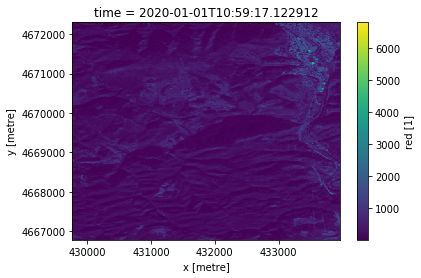

In [93]:
ds['red'].isel(time=0).plot()

In [94]:
#window10= rasterio.windows.Window(0, 0,1080,1080) #provisional

In [95]:
#nir_ds2 = ds['nir'].rio.isel_window(window10)  #provisional
#nir_ds2

This is the Xarray format: http://xarray.pydata.org/en/stable/data-structures.html

Next I would like to learn how to present a graphical results of this:
https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Beginners_guide/04_Loading_data.ipynb

## Creating a plot

The numpy array of values is two dimensional and I need to reduce the dimensions to one with squeeze
https://stackoverflow.com/questions/41203137/how-do-you-reduce-the-dimension-of-a-numpy-array

In [96]:
ndvi=(ds['nir']-ds['red'])/(ds['nir']+ds['red'])
ndvi
#print(type(ndvi))

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.703316, 0.763341, ..., 0.43088 , 0.434178],
        [0.931889, 0.864198, ..., 0.444333, 0.450207],
        ...,
        [0.687536, 0.657767, ..., 0.499261, 0.50541 ],
        [0.654639, 0.640832, ..., 0.524904, 0.471095]],

       [[0.610116, 0.67519 , ..., 0.468571, 0.438849],
        [0.703511, 0.811189, ..., 0.457594, 0.402619],
        ...,
        [0.638784, 0.603362, ..., 0.543592, 0.540881],
        [0.660849, 0.627654, ..., 0.5275  , 0.489177]],

       ...,

       [[0.1875  , 0.182787, ..., 0.254521, 0.23638 ],
        [0.164007, 0.172255, ..., 0.242236, 0.248114],
        ...,
        [0.260395, 0.257361, ..., 0.260484, 0.243961],
        [0.261098, 0.254533, ..., 0.225237, 0.225   ]],

       [[0.599186, 0.645756, ..., 0.466302, 0.43273 ],
        [0.728916, 0.687964, ..., 0.424372, 0.435115],
        ...,
        [0.610094, 0.587318, ..., 0.53903 , 0.519961],
        [0.623998, 0.60803 , ..., 0.51075 , 0.511059]]])
Co

In [97]:
print(ndvi)

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[0.703316, 0.763341, ..., 0.43088 , 0.434178],
        [0.931889, 0.864198, ..., 0.444333, 0.450207],
        ...,
        [0.687536, 0.657767, ..., 0.499261, 0.50541 ],
        [0.654639, 0.640832, ..., 0.524904, 0.471095]],

       [[0.610116, 0.67519 , ..., 0.468571, 0.438849],
        [0.703511, 0.811189, ..., 0.457594, 0.402619],
        ...,
        [0.638784, 0.603362, ..., 0.543592, 0.540881],
        [0.660849, 0.627654, ..., 0.5275  , 0.489177]],

       ...,

       [[0.1875  , 0.182787, ..., 0.254521, 0.23638 ],
        [0.164007, 0.172255, ..., 0.242236, 0.248114],
        ...,
        [0.260395, 0.257361, ..., 0.260484, 0.243961],
        [0.261098, 0.254533, ..., 0.225237, 0.225   ]],

       [[0.599186, 0.645756, ..., 0.466302, 0.43273 ],
        [0.728916, 0.687964, ..., 0.424372, 0.435115],
        ...,
        [0.610094, 0.587318, ..., 0.53903 , 0.519961],
        [0.623998, 0.60803 , ..., 0.51075 , 0.511059]]])
Co

In [98]:
ndvi.values[0,0,0],ndvi.values[0,1,1]

(0.7033158813263525, 0.8641975308641975)

Removing values considered nodata.

In [101]:
scl = ds['scl']
good_data = scl.where((scl == 4) | (scl == 5) | (scl == 6))
#good_data
ndvi_no_cloud = ndvi.where(good_data>=0)
ndvi_no_cloud

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[     nan,      nan, ..., 0.43088 , 0.434178],
        [     nan,      nan, ..., 0.444333, 0.450207],
        ...,
        [0.687536, 0.657767, ...,      nan,      nan],
        [0.654639, 0.640832, ...,      nan,      nan]],

       [[0.610116,      nan, ..., 0.468571, 0.438849],
        [0.703511,      nan, ..., 0.457594, 0.402619],
        ...,
        [0.638784, 0.603362, ..., 0.543592, 0.540881],
        [0.660849, 0.627654, ..., 0.5275  , 0.489177]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[0.599186,      nan, ..., 0.466302, 0.43273 ],
        [0.728916,      nan, ..., 0.424372, 0.435115],
        ...,
        [0.610094, 0.587318, ..., 0.53903 , 0.519961],
        [0.623998, 0.60803 , ..., 0.51075 , 0.511059]]])
Co

In [100]:
ndvi_no_cloud.values

array([[[       nan,        nan,        nan, ..., 0.5370019 ,
         0.43087971, 0.43417825],
        [       nan,        nan,        nan, ..., 0.46851654,
         0.444333  , 0.45020652],
        [       nan,        nan,        nan, ..., 0.49074074,
         0.47045455, 0.43041109],
        ...,
        [0.66506667, 0.63939808, 0.63652858, ..., 0.54205607,
         0.55211558, 0.52771619],
        [0.6875359 , 0.65776699, 0.63820316, ..., 0.48209366,
                nan,        nan],
        [0.65463918, 0.64083176, 0.6115454 , ..., 0.5284128 ,
                nan,        nan]],

       [[0.61011591,        nan,        nan, ..., 0.47923791,
         0.46857143, 0.43884892],
        [0.70351105,        nan,        nan, ..., 0.51012146,
         0.45759369, 0.40261866],
        [       nan,        nan,        nan, ..., 0.47702407,
         0.42566191, 0.40935412],
        ...,
        [0.61985958, 0.62211982, 0.60062321, ..., 0.49892566,
         0.4799117 , 0.47805569],
        [0.6

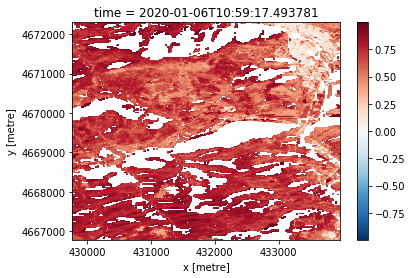

In [38]:
ndvi_no_cloud.isel(time=0).plot()

Using a "Smoothing with rolling mean"
http://xarray.pydata.org/en/stable/generated/xarray.Dataset.rolling.htmlhttp://xarray.pydata.org/en/stable/generated/xarray.Dataset.rolling.html

In [39]:
ndvi_sth=ndvi_no_cloud.rolling(time=5, min_periods=1, center=True).mean()
ndvi_sth

<xarray.DataArray (time: 5, y: 552, x: 419)>
array([[[0.610116,      nan, ..., 0.447568, 0.423109],
        [0.703511,      nan, ..., 0.442439, 0.396631],
        ...,
        [0.636248, 0.611376, ..., 0.539238, 0.528666],
        [0.646837, 0.622835, ..., 0.503411, 0.489542]],

       [[0.610116,      nan, ..., 0.447568, 0.423109],
        [0.703511,      nan, ..., 0.442439, 0.396631],
        ...,
        [0.636248, 0.611376, ..., 0.539238, 0.528666],
        [0.646837, 0.622835, ..., 0.503411, 0.489542]],

       ...,

       [[0.599186,      nan, ..., 0.446812, 0.42107 ],
        [0.728916,      nan, ..., 0.431365, 0.407463],
        ...,
        [0.626685, 0.606028, ..., 0.536957, 0.518206],
        [0.634554, 0.616294, ..., 0.495036, 0.500483]],

       [[0.599186,      nan, ..., 0.453509, 0.439524],
        [0.728916,      nan, ..., 0.441587, 0.42197 ],
        ...,
        [0.623731, 0.602192, ..., 0.53903 , 0.519961],
        [0.632404, 0.618066, ..., 0.51075 , 0.511059]]])
Co

In [40]:
ndvi_sth.expand_dims({'time2':'dates[0]'})

<xarray.DataArray (time2: 1, time: 5, y: 552, x: 419)>
array([[[[0.610116, ..., 0.423109],
         ...,
         [0.646837, ..., 0.489542]],

        ...,

        [[0.599186, ..., 0.439524],
         ...,
         [0.632404, ..., 0.511059]]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-06T10:59:17.493781 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05
Dimensions without coordinates: time2

- Plot NDVI on specific date

In [41]:
#ndvi.sel(time='2020-03-08T10:49:22.992599000').plot.imshow()
#ndvi_sth.sel(time='2020-03-08T10:49:22.992599000').plot.imshow()

In [42]:
import numpy as np
y=np.squeeze(ndvi_sth.values)
y

array([[[0.61011591,        nan,        nan, ..., 0.4813593 ,
         0.44756849, 0.42310906],
        [0.70351105,        nan,        nan, ..., 0.49540822,
         0.44243938, 0.39663091],
        [       nan,        nan,        nan, ..., 0.4609271 ,
         0.40831373, 0.41062155],
        ...,
        [0.61509286, 0.6114428 , 0.59825183, ..., 0.49329987,
         0.49540041, 0.48902334],
        [0.63624832, 0.6113757 , 0.59871667, ..., 0.50197786,
         0.53923795, 0.52866558],
        [0.64683736, 0.62283517, 0.61700061, ..., 0.4340984 ,
         0.50341102, 0.48954164]],

       [[0.61011591,        nan,        nan, ..., 0.4813593 ,
         0.44756849, 0.42310906],
        [0.70351105,        nan,        nan, ..., 0.49540822,
         0.44243938, 0.39663091],
        [       nan,        nan,        nan, ..., 0.4609271 ,
         0.40831373, 0.41062155],
        ...,
        [0.61509286, 0.6114428 , 0.59825183, ..., 0.49329987,
         0.49540041, 0.48902334],
        [0.6

In [43]:
ndvi_sth.coords

Coordinates:
  * time     (time) datetime64[ns] 2020-01-06T10:59:17.493781 ... 2020-01-16T10:59:16.706748
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

In [44]:
#ndvi_sth.attrs
#ndvi_sth.data   #is an array
#ndvi_sth.name  #nothing
ndvi_sth.dims

('time', 'y', 'x')

In [45]:
ndvi_sth.attrs

OrderedDict()

In [46]:
x=ndvi_sth.coords['time'].values
x

array(['2020-01-06T10:59:17.493781000', '2020-01-08T10:49:21.434616000',
       '2020-01-11T10:59:16.982085000', '2020-01-13T10:49:21.383247000',
       '2020-01-16T10:59:16.706748000'], dtype='datetime64[ns]')

In [47]:
print (type(x))

<class 'numpy.ndarray'>


In [48]:
print (type(y))
print (y[3])

<class 'numpy.ndarray'>
[[0.59918616        nan        nan ... 0.48102606 0.44681213 0.42106958]
 [0.72891566        nan        nan ... 0.48215484 0.4313654  0.40746286]
 [       nan        nan        nan ... 0.46286805 0.4077911  0.41427097]
 ...
 [0.60807528 0.60110057 0.59489184 ... 0.48752739 0.50158948 0.49040985]
 [0.62668492 0.60602757 0.59127256 ... 0.48531334 0.53695687 0.51820561]
 [0.63455361 0.61629377 0.60245926 ... 0.43093432 0.4950358  0.50048258]]


The following code is inspired by:
https://stackoverflow.com/questions/19079143/how-to-plot-time-series-in-python
https://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline

Test change-plot

In [49]:
#example
"""
import matplotlib.pyplot as plt

titles = dp.dates(faus) # product date 
fig,ax = plt.subplots(1,1,figsize=(6,6))
re_frgb[0].plot.imshow(robust=True,ax=ax);
ax.set(title=titles[0])
plt.show()
"""

'\nimport matplotlib.pyplot as plt\n\ntitles = dp.dates(faus) # product date \nfig,ax = plt.subplots(1,1,figsize=(6,6))\nre_frgb[0].plot.imshow(robust=True,ax=ax);\nax.set(title=titles[0])\nplt.show()\n'

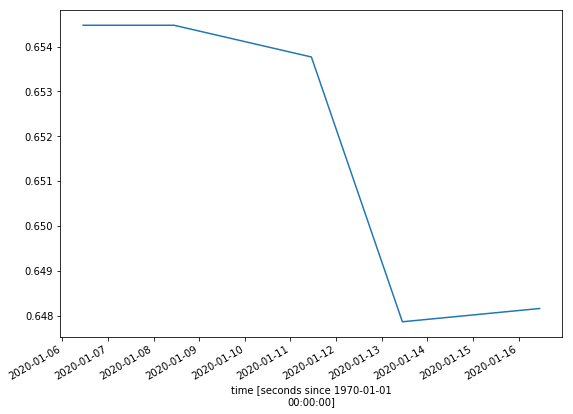

In [50]:
#ndvi.dim=['x', 'y'].plot(size=6)
ndvi_sth.mean(dim=['x', 'y']).plot(size=6)

In [51]:
#ndvi.plot(col='time', vmin=-0.50, vmax=0.8, cmap='RdYlGn')

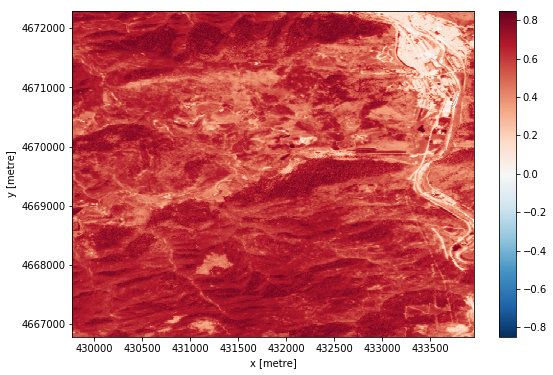

In [52]:
#ndvi_sth.mean(dim=['time']).plot(size=6)
ndvi.mean(dim=['time']).plot(size=6)

In [53]:
#sample = ndvi[:, 125:150, 100:125]

In [54]:
#rgb_bands = ['B04', 'B03', 'B02']
#time_series_scenes.sel(band=rgb_bands).plot.imshow(col='time', robust=True)
#sample.groupby('time.month').mean(dim='time').sel(band='red').plot.imshow(col='month', robust=True)

In [55]:
#ndvi.y.plot()  ##change

In [56]:
ndvi.isel(time=0)

<xarray.DataArray (y: 552, x: 419)>
array([[0.610116, 0.67519 , 0.694397, ..., 0.479238, 0.468571, 0.438849],
       [0.703511, 0.811189, 0.85558 , ..., 0.510121, 0.457594, 0.402619],
       [0.896641, 0.93808 , 0.988796, ..., 0.477024, 0.425662, 0.409354],
       ...,
       [0.61986 , 0.62212 , 0.600623, ..., 0.498926, 0.479912, 0.478056],
       [0.638784, 0.603362, 0.606654, ..., 0.535262, 0.543592, 0.540881],
       [0.660849, 0.627654, 0.623304, ..., 0.454982, 0.5275  , 0.489177]])
Coordinates:
    time     datetime64[ns] 2020-01-06T10:59:17.493781
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

In [57]:
ndvi.values[1,1,1]

0.7712031558185405

In [58]:
#in process
#ndvi_sth.sel(time='2020-01-01').plot.imshow()
#ndvi_sth.sel(time='2020-01-01')[y]
##da = ds.sel(time='2020-02-15T10:59:18.325276000')['nir']
##print (type(da))
#print('Image size (Gb): ', da.nbytes/1e9)
##da.plot.imshow()
#ndvi_sth.plot.imshow()

"""
da = DS.sel(time='2013-04-21')['B4']
print('Image size (Gb): ', da.nbytes/1e9)
da.plot.imshow()
"""

"\nda = DS.sel(time='2013-04-21')['B4']\nprint('Image size (Gb): ', da.nbytes/1e9)\nda.plot.imshow()\n"

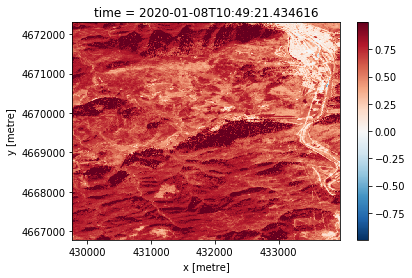

In [59]:
ndvi.isel(time=1).plot()

In [60]:
#ndvi.isel(time=0).rio.to_raster("ndvi_0.tif")
#ndvi.isel(time=0).rio.to_raster("ndvi_0.tif", dtype="float32")

In [61]:
"""
import matplotlib.pyplot as plt
titles = ndvi_sth.coords['time'].values
#titles = x # product date     # ds.dates(x) 'Dataset' object has no attribute 'dates'
fig,ax = plt.subplots(1,1,figsize=(6,6))

#plt.plot(y)
#plt.plot( ndvi_sth.coords['x'].values)  #0k
plt.plot( ndvi_sth.coords['y'].values)
#y.plot.imshow(robust=True,ax=ax);   #'numpy.ndarray' object has no attribute 'plot'
#ndvi_sth.coords['y'].values.plot.imshow(robust=True,ax=ax);
ax.set(title=titles[0])
plt.show()
"""

"\nimport matplotlib.pyplot as plt\ntitles = ndvi_sth.coords['time'].values\n#titles = x # product date     # ds.dates(x) 'Dataset' object has no attribute 'dates'\nfig,ax = plt.subplots(1,1,figsize=(6,6))\n\n#plt.plot(y)\n#plt.plot( ndvi_sth.coords['x'].values)  #0k\nplt.plot( ndvi_sth.coords['y'].values)\n#y.plot.imshow(robust=True,ax=ax);   #'numpy.ndarray' object has no attribute 'plot'\n#ndvi_sth.coords['y'].values.plot.imshow(robust=True,ax=ax);\nax.set(title=titles[0])\nplt.show()\n"

In [62]:
"""
%matplotlib notebook

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()
"""

'\n%matplotlib notebook\n\nimport matplotlib.pyplot as plt\nplt.plot(x,y)\nplt.xticks(rotation=90)\nplt.show()\n'

Lets consider the phenology examplained here: https://docs.dea.ga.gov.au/notebooks/Real_world_examples/Vegetation_phenology.html
and implemented here:
https://github.com/GeoscienceAustralia/dea-notebooks/blob/develop/Tools/dea_tools/temporal.py

In [63]:
mask = ndvi_sth.isnull()

Replacing nodata by 0.

In [64]:
ndvi_cl = ndvi_sth.where(~mask, other=0)
ndvi_cl

<xarray.DataArray (time: 5, y: 552, x: 419)>
array([[[0.610116, 0.      , ..., 0.447568, 0.423109],
        [0.703511, 0.      , ..., 0.442439, 0.396631],
        ...,
        [0.636248, 0.611376, ..., 0.539238, 0.528666],
        [0.646837, 0.622835, ..., 0.503411, 0.489542]],

       [[0.610116, 0.      , ..., 0.447568, 0.423109],
        [0.703511, 0.      , ..., 0.442439, 0.396631],
        ...,
        [0.636248, 0.611376, ..., 0.539238, 0.528666],
        [0.646837, 0.622835, ..., 0.503411, 0.489542]],

       ...,

       [[0.599186, 0.      , ..., 0.446812, 0.42107 ],
        [0.728916, 0.      , ..., 0.431365, 0.407463],
        ...,
        [0.626685, 0.606028, ..., 0.536957, 0.518206],
        [0.634554, 0.616294, ..., 0.495036, 0.500483]],

       [[0.599186, 0.      , ..., 0.453509, 0.439524],
        [0.728916, 0.      , ..., 0.441587, 0.42197 ],
        ...,
        [0.623731, 0.602192, ..., 0.53903 , 0.519961],
        [0.632404, 0.618066, ..., 0.51075 , 0.511059]]])
Co

vPOS = Value at peak of season:

In [62]:
ndvi_cl.max("time").values

array([[0.61011591, 0.        , 0.        , ..., 0.5081199 , 0.45350913,
        0.43952443],
       [0.72891566, 0.        , 0.        , ..., 0.49147705, 0.44291279,
        0.42196959],
       [0.        , 0.        , 0.        , ..., 0.47769902, 0.42417856,
        0.42661039],
       ...,
       [0.63228885, 0.62103718, 0.6096146 , ..., 0.50548892, 0.51302252,
        0.49869655],
       [0.65297091, 0.62494285, 0.60858829, ..., 0.49780056, 0.53923795,
        0.52866558],
       [0.65144712, 0.62733432, 0.61563681, ..., 0.47617803, 0.51074956,
        0.51105937]])

POS = DOY of peak of season

In [63]:
ndvi_cl.isel(time=ndvi_cl.argmax("time")).time.dt.dayofyear.values

array([[ 1,  1,  1, ...,  1, 16, 16],
       [13,  1,  1, ..., 11,  6, 16],
       [ 1,  1,  1, ..., 16,  1, 16],
       ...,
       [ 1,  1,  1, ...,  6, 16,  6],
       [ 1,  1,  6, ..., 11,  1,  1],
       [ 1,  6,  6, ...,  1, 16, 16]], dtype=int64)

Trough = Minimum value

In [64]:
ndvi_cl.min("time").values

array([[0.59918616, 0.        , 0.        , ..., 0.48043001, 0.44339629,
        0.41906235],
       [0.70351105, 0.        , 0.        , ..., 0.48215484, 0.4313654 ,
        0.40625181],
       [0.        , 0.        , 0.        , ..., 0.46286805, 0.4077911 ,
        0.40978578],
       ...,
       [0.60614278, 0.60085404, 0.59489184, ..., 0.48752739, 0.49617004,
        0.48732131],
       [0.62373108, 0.60219169, 0.59127256, ..., 0.48531334, 0.53695687,
        0.51820561],
       [0.63240391, 0.61629377, 0.59863586, ..., 0.42383184, 0.4950358 ,
        0.48954164]])

AOS = Amplitude of season

In [65]:
(ndvi_cl.max("time")-ndvi_cl.min("time")).values

array([[0.01092975, 0.        , 0.        , ..., 0.02768989, 0.01011283,
        0.02046208],
       [0.02540461, 0.        , 0.        , ..., 0.00932221, 0.01154739,
        0.01571778],
       [0.        , 0.        , 0.        , ..., 0.01483097, 0.01638745,
        0.01682461],
       ...,
       [0.02614607, 0.02018314, 0.01472276, ..., 0.01796153, 0.01685248,
        0.01137524],
       [0.02923982, 0.02275116, 0.01731573, ..., 0.01248722, 0.00228108,
        0.01045997],
       [0.01904321, 0.01104055, 0.01700095, ..., 0.05234619, 0.01571377,
        0.02151773]])

vSOS = Value at the start of season

In [66]:
# select timesteps before peak of season (AKA greening)
greenup = ndvi_cl.where(ndvi_cl.time < ndvi_cl.isel(time=ndvi_cl.argmax("time")).time)
# find the first order slopes
green_deriv = greenup.differentiate("time")
# find where the first order slope is postive
pos_green_deriv = green_deriv.where(green_deriv > 0)
# positive slopes on greening side
pos_greenup = greenup.where(pos_green_deriv)
pos_greenup

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[     nan,      nan, ..., 0.44429 , 0.419062],
        [0.703511,      nan, ..., 0.437616, 0.410425],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan, 0.627079, ..., 0.503411, 0.489542]],

       [[     nan,      nan, ..., 0.443396, 0.425876],
        [0.703511,      nan, ...,      nan, 0.410025],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ..., 0.503411, 0.489542]],

       ...,

       [[     nan,      nan, ..., 0.446812, 0.42107 ],
        [     nan,      nan, ...,      nan, 0.407463],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ..., 0.495036, 0.500483]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]]])
Co

In [67]:
# find the median
median = pos_greenup.median("time")
median

<xarray.DataArray (y: 552, x: 419)>
array([[     nan,      nan,      nan, ...,      nan, 0.44429 , 0.425514],
       [0.703511,      nan,      nan, ..., 0.486444, 0.437616, 0.410025],
       [     nan,      nan,      nan, ..., 0.46699 ,      nan, 0.414271],
       ...,
       [     nan,      nan,      nan, ..., 0.499766, 0.503584, 0.496436],
       [     nan,      nan, 0.60696 , ..., 0.497007,      nan,      nan],
       [     nan, 0.627079, 0.614985, ...,      nan, 0.503411, 0.489542]])
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

In [68]:
# distance of values from median
distance = pos_greenup - median
distance

<xarray.DataArray (time: 6, y: 552, x: 419)>
array([[[      nan,       nan, ...,  0.      , -0.006452],
        [ 0.      ,       nan, ...,  0.      ,  0.0004  ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,  0.      , ...,  0.      ,  0.      ]],

       [[      nan,       nan, ..., -0.000893,  0.000362],
        [ 0.      ,       nan, ...,       nan,  0.      ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,  0.      ,  0.      ]],

       ...,

       [[      nan,       nan, ...,  0.002522, -0.004445],
        [      nan,       nan, ...,       nan, -0.002562],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ..., -0.008375,  0.010941]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],

In [69]:
def allNaN_arg(da, dim, stat):
    """
    Calculate da.argmax() or da.argmin() while handling
    all-NaN slices. Fills all-NaN locations with an
    float and then masks the offending cells.
    Params
    ------
    xarr : xarray.DataArray
    dim : str, 
            Dimension over which to calculate argmax, argmin e.g. 'time'
    stat : str,
        The statistic to calculte, either 'min' for argmin()
        or 'max' for .argmax()
    Returns
    ------
    xarray.DataArray
    """
    # generate a mask where entire axis along dimension is NaN
    mask = da.isnull().all(dim)

    if stat == "max":
        y = da.fillna(float(da.min() - 1))
        y = y.argmax(dim=dim, skipna=True).where(~mask)
        return y

    if stat == "min":
        y = da.fillna(float(da.max() + 1))
        y = y.argmin(dim=dim, skipna=True).where(~mask)
        return y

In [70]:
# find index (argmin) where distance is most negative
idx = allNaN_arg(distance, "time", "min").astype("int16")
idx

<xarray.DataArray (y: 552, x: 419)>
array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 3],
       [0, 0, 0, ..., 4, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 4, 0]], dtype=int16)
Coordinates:
  * y        (y) float64 4.672e+06 4.672e+06 4.672e+06 ... 4.667e+06 4.667e+06
  * x        (x) float64 4.298e+05 4.298e+05 4.298e+05 ... 4.339e+05 4.34e+05

In [71]:
# find index (argmin) where distance is smallest absolute value
idx = allNaN_arg(xr.ufuncs.fabs(distance), "time", "min").astype("int16")
idx.values

array([[0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 4],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

SOS = DOY for start of season

In [72]:
ndvi_cl.coords['time'].values[idx.values[0][0]]

numpy.datetime64('2020-01-01T10:59:17.122912000')